# U.S. Medical Insurance Market Analysis in 2018 - 2020

# Research Questions
1. How do health insurance rates vary across state?
2. How did health insurance rates change from 2018 to 2020? And how did Covid-19 impact on US health insurance market?
3. How do health insurance rates vary between smokes and non-smokers?


# About Data
- Data obtained from CMS.gov: Centers for Medicare & Medicaid Services 
- https://www.cms.gov/cciio/resources/data-resources
- These Health Insurance Exchange Public Use Files (Exchange PUFs) are available for supporting timely benefit and rate analysis.
- Six datasets including 'Benefits and Cost Sharing', 'Rate', 'Plan Attributes', 'Business Rules', 'Service Area' and 'Network'
- Collected and joined 2018 - 2020 datasets
- The datasets contain medical insurance information of 38 states of the U.S.

# Load Packages

In [1]:
import pandas as pd
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta

import seaborn as sns 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from pandas.plotting import lag_plot

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Map creation
import plotly.express as px  
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tls 
from collections import Counter 



# Load Dataset

In [2]:
Plan = pd.read_parquet("Plan.parquet")

In [3]:
Benefits = pd.read_parquet("Benefits_Cost_Sharing.parquet")

In [4]:
Rate = pd.read_parquet("Rate.parquet")

In [5]:
business = pd.read_parquet("business.parquet")
network = pd.read_parquet("network.parquet")
service = pd.read_parquet("service.parquet")

# Descriptive Statistics

In [6]:
# Function to list all
def list_all(data):
  with pd.option_context("display.max_rows", 1000):
    display(data)

In [7]:
Plan.head(3)

BusinessYear StateCode  IssuerId SourceName           ImportDate  \
0          2018        AK     21989       HIOS  2017-09-26 02:21:16   
1          2018        AK     21989       HIOS  2017-09-26 02:21:16   
2          2018        AK     21989       HIOS  2017-09-26 02:21:16   

       MarketCoverage DentalOnlyPlan         TIN StandardComponentId  \
0  SHOP (Small Group)            Yes  93-0438772      21989AK0130001   
1          Individual            Yes  93-0438772      21989AK0030001   
2          Individual            Yes  93-0438772      21989AK0030001   

                                 PlanMarketingName  ...  \
0  Delta Dental Premier, +2000, 100*/80/50, 50, PF  ...   
1                        Delta Dental Premier Plan  ...   
2                        Delta Dental Premier Plan  ...   

  TEHBDedOutOfNetFamilyPerGroup  TEHBDedCombInnOonIndividual  \
0                          None                         None   
1                          None                         None   
2                          None                         None   

  TEHBDedCombInnOonFamilyPerPerson TEHBDedCombInnOonFamilyPerGroup  \
0                             None                            None   
1                             None                            None   
2                             None                            None   

  IsHSAEligible HSAOrHRAEmployerContribution  \
0          None                         None   
1          None                         None   
2          None                         None   

  HSAOrHRAEmployerContributionAmount URLForSummaryofBenefitsCoverage  \
0                               None                            None   
1                               None                            None   
2                               None                            None   

                                        PlanBrochure  \
0  https://www.modahealth.com/pdfs/ben_sum/AK/170...   
1  https://www.modahealth.com/pdfs/plans/individu...   
2  https://www.modahealth.com/pdfs/plans/individu...   

  IssuerMarketPlaceMarketingName  
0                           None  
1                           None  
2                           None  

[3 rows x 153 columns]

In [8]:
Plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68357 entries, 0 to 68356
Columns: 153 entries, BusinessYear to IssuerMarketPlaceMarketingName
dtypes: float64(8), int64(5), object(140)
memory usage: 79.8+ MB


In [9]:
Plan.shape

(68357, 153)

In [10]:
with pd.option_context("display.max_rows", 1000):
    display(Plan.isnull().sum())

BusinessYear                                                        0
StateCode                                                           0
IssuerId                                                            0
SourceName                                                          0
ImportDate                                                          0
MarketCoverage                                                      0
DentalOnlyPlan                                                      0
TIN                                                             20236
StandardComponentId                                                 0
PlanMarketingName                                                   0
HIOSProductId                                                       0
HPID                                                            59910
NetworkId                                                           0
ServiceAreaId                                                       0
FormularyId         

In [11]:
Benefits.head(3)

BusinessYear StateCode  IssuerId SourceName           ImportDate  \
0          2018        AK     21989       HIOS  2017-09-26 02:21:16   
1          2018        AK     21989       HIOS  2017-09-26 02:21:16   
2          2018        AK     21989       HIOS  2017-09-26 02:21:16   

  StandardComponentId             PlanId                      BenefitName  \
0      21989AK0030001  21989AK0030001-00  Routine Dental Services (Adult)   
1      21989AK0030001  21989AK0030001-00     Dental Check-Up for Children   
2      21989AK0030001  21989AK0030001-00        Basic Dental Care - Child   

    CopayInnTier1 CopayInnTier2  ... IsEHB IsCovered QuantLimitOnSvc LimitQty  \
0  Not Applicable          None  ...  None   Covered             Yes   1000.0   
1  Not Applicable          None  ...   Yes   Covered             Yes      1.0   
2  Not Applicable          None  ...   Yes   Covered            None      NaN   

               LimitUnit Exclusions                      Explanation  \
0       Dollars per Year       None  Combined annual benefit maximum   
1  Visit(s) per 6 Months       None                             None   
2                   None       None                             None   

          EHBVarReason IsExclFromInnMOOP IsExclFromOonMOOP  
0              Not EHB                No                No  
1  Substantially Equal                No                No  
2                 None                No                No  

[3 rows x 24 columns]

In [12]:
Benefits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317687 entries, 0 to 4317686
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   BusinessYear         int64  
 1   StateCode            object 
 2   IssuerId             int64  
 3   SourceName           object 
 4   ImportDate           object 
 5   StandardComponentId  object 
 6   PlanId               object 
 7   BenefitName          object 
 8   CopayInnTier1        object 
 9   CopayInnTier2        object 
 10  CopayOutofNet        object 
 11  CoinsInnTier1        object 
 12  CoinsInnTier2        object 
 13  CoinsOutofNet        object 
 14  IsEHB                object 
 15  IsCovered            object 
 16  QuantLimitOnSvc      object 
 17  LimitQty             float64
 18  LimitUnit            object 
 19  Exclusions           object 
 20  Explanation          object 
 21  EHBVarReason         object 
 22  IsExclFromInnMOOP    object 
 23  IsExclFromOonMOOP    object 
dty

In [13]:
Benefits.shape

(4317687, 24)

In [14]:
Benefits.isnull().sum()

BusinessYear                 0
StateCode                    0
IssuerId                     0
SourceName                   0
ImportDate                   0
StandardComponentId          0
PlanId                       0
BenefitName                  0
CopayInnTier1           954246
CopayInnTier2          3646762
CopayOutofNet           954246
CoinsInnTier1           954246
CoinsInnTier2          3646762
CoinsOutofNet           954246
IsEHB                  1085984
IsCovered               179594
QuantLimitOnSvc        3191209
LimitQty               3717242
LimitUnit              3717407
Exclusions             4088099
Explanation            3005999
EHBVarReason           3233094
IsExclFromInnMOOP       723447
IsExclFromOonMOOP       725391
dtype: int64

In [15]:
Rate.head(3)

BusinessYear StateCode  IssuerId SourceName           ImportDate  \
0          2018        AK     21989       HIOS  2017-09-26 02:21:16   
1          2018        AK     21989       HIOS  2017-09-26 02:21:16   
2          2018        AK     21989       HIOS  2017-09-26 02:21:16   

   FederalTIN RateEffectiveDate RateExpirationDate          PlanId  \
0  93-0438772        2018-01-01         2018-12-31  21989AK0030001   
1  93-0438772        2018-01-01         2018-03-31  21989AK0090001   
2  93-0438772        2018-04-01         2018-06-30  21989AK0090001   

    RatingAreaId  ...   Age IndividualRate  IndividualTobaccoRate  Couple  \
0  Rating Area 1  ...  0-14           53.0                    NaN     NaN   
1  Rating Area 1  ...  0-14           63.0                    NaN     NaN   
2  Rating Area 1  ...  0-14           64.0                    NaN     NaN   

   PrimarySubscriberAndOneDependent  PrimarySubscriberAndTwoDependents  \
0                               NaN                                NaN   
1                               NaN                                NaN   
2                               NaN                                NaN   

   PrimarySubscriberAndThreeOrMoreDependents  CoupleAndOneDependent  \
0                                        NaN                    NaN   
1                                        NaN                    NaN   
2                                        NaN                    NaN   

   CoupleAndTwoDependents  CoupleAndThreeOrMoreDependents  
0                     NaN                             NaN  
1                     NaN                             NaN  
2                     NaN                             NaN  

[3 rows x 21 columns]

In [16]:
Rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8279534 entries, 0 to 8279533
Data columns (total 21 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   BusinessYear                               int64  
 1   StateCode                                  object 
 2   IssuerId                                   int64  
 3   SourceName                                 object 
 4   ImportDate                                 object 
 5   FederalTIN                                 object 
 6   RateEffectiveDate                          object 
 7   RateExpirationDate                         object 
 8   PlanId                                     object 
 9   RatingAreaId                               object 
 10  Tobacco                                    object 
 11  Age                                        object 
 12  IndividualRate                             float64
 13  IndividualTobaccoRate                     

In [17]:
Rate.shape

(8279534, 21)

In [18]:
Rate.isnull().sum()

BusinessYear                                       0
StateCode                                          0
IssuerId                                           0
SourceName                                         0
ImportDate                                         0
FederalTIN                                   2136450
RateEffectiveDate                                  0
RateExpirationDate                                 0
PlanId                                             0
RatingAreaId                                       0
Tobacco                                         6365
Age                                                0
IndividualRate                                     0
IndividualTobaccoRate                        5743202
Couple                                       8273883
PrimarySubscriberAndOneDependent             8273883
PrimarySubscriberAndTwoDependents            8273883
PrimarySubscriberAndThreeOrMoreDependents    8273883
CoupleAndOneDependent                        8

In [19]:
business.head(3)

BusinessYear StateCode  IssuerId SourceName           ImportDate  \
0          2018        AK     21989       HIOS  2017-09-26 02:21:16   
1          2018        AK     21989       HIOS  2017-09-26 02:21:16   
2          2018        AK     21989       HIOS  2017-09-26 02:21:16   

          TIN   ProductId StandardComponentId  \
0  93-0438772  21989AK003      21989AK0030001   
1  93-0438772  21989AK005      21989AK0050001   
2  93-0438772  21989AK005      21989AK0050002   

               EnrolleeContractRateDeterminationRule  \
0  A different rate (specifically for parties of ...   
1  A different rate (specifically for parties of ...   
2  A different rate (specifically for parties of ...   

  TwoParentFamilyMaxDependentsRule  ... DomesticPartnerAsSpouseIndicator  \
0                        3 or more  ...                              Yes   
1                        3 or more  ...                              Yes   
2                        3 or more  ...                              Yes   

  SameSexPartnerAsSpouseIndicator   AgeDeterminationRule  \
0                             Yes  Age on effective date   
1                             Yes  Age on effective date   
2                             Yes  Age on effective date   

  MinimumTobaccoFreeMonthsRule  \
0               Not Applicable   
1               Not Applicable   
2               Not Applicable   

                                    CohabitationRule MarketCoverage  \
0  Spouse,No;Grandson or Granddaughter,No;Adopted...     Individual   
1  Spouse,No;Grandson or Granddaughter,No;Adopted...     Individual   
2  Spouse,No;Grandson or Granddaughter,No;Adopted...     Individual   

  DentalOnlyPlan MedicalDentalBoth MedicalDentalIndicator  \
0            Yes              None                   None   
1            Yes              None                   None   
2            Yes              None                   None   

  MaximumUnderageDependent  
0                     None  
1                     None  
2                     None  

[3 rows x 23 columns]

In [20]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18430 entries, 0 to 18429
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   BusinessYear                           18430 non-null  int64 
 1   StateCode                              18430 non-null  object
 2   IssuerId                               18430 non-null  int64 
 3   SourceName                             18430 non-null  object
 4   ImportDate                             18430 non-null  object
 5   TIN                                    13433 non-null  object
 6   ProductId                              18430 non-null  object
 7   StandardComponentId                    18430 non-null  object
 8   EnrolleeContractRateDeterminationRule  13433 non-null  object
 9   TwoParentFamilyMaxDependentsRule       13433 non-null  object
 10  SingleParentFamilyMaxDependentsRule    13433 non-null  object
 11  DependentMaximu

In [21]:
business.shape

(18430, 23)

In [22]:
business.isnull().sum()

BusinessYear                                 0
StateCode                                    0
IssuerId                                     0
SourceName                                   0
ImportDate                                   0
TIN                                       4997
ProductId                                    0
StandardComponentId                          0
EnrolleeContractRateDeterminationRule     4997
TwoParentFamilyMaxDependentsRule          4997
SingleParentFamilyMaxDependentsRule       4997
DependentMaximumAgRule                       0
ChildrenOnlyContractMaxChildrenRule       4997
DomesticPartnerAsSpouseIndicator          4997
SameSexPartnerAsSpouseIndicator           4997
AgeDeterminationRule                         0
MinimumTobaccoFreeMonthsRule                 0
CohabitationRule                             0
MarketCoverage                               0
DentalOnlyPlan                               0
MedicalDentalBoth                        13433
MedicalDental

In [23]:
network.head(3)

BusinessYear StateCode  IssuerId SourceName           ImportDate  \
0          2018        AK     21989       HIOS  2017-09-26 02:21:16   
1          2018        AK     21989       HIOS  2017-09-26 02:21:16   
2          2018        AK     38344       HIOS  2017-11-01 02:20:20   

                      NetworkName NetworkId  \
0            Delta Dental Premier    AKN001   
1                Delta Dental PPO    AKN002   
2  HeritagePlus and Dental Choice    AKN001   

                                          NetworkURL MarketCoverage  \
0  https://www.modahealth.com/shop/provider-searc...           None   
1  https://www.modahealth.com/shop/provider-searc...           None   
2  https://premera.vitalschoice.com/?ci=premeraak...           None   

  DentalOnlyPlan  
0           None  
1           None  
2           None

In [24]:
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BusinessYear    2577 non-null   int64 
 1   StateCode       2577 non-null   object
 2   IssuerId        2577 non-null   int64 
 3   SourceName      2577 non-null   object
 4   ImportDate      2577 non-null   object
 5   NetworkName     2577 non-null   object
 6   NetworkId       2577 non-null   object
 7   NetworkURL      2544 non-null   object
 8   MarketCoverage  2020 non-null   object
 9   DentalOnlyPlan  2020 non-null   object
dtypes: int64(2), object(8)
memory usage: 201.5+ KB


In [25]:
network.shape

(2577, 10)

In [26]:
network.isnull().sum()

BusinessYear        0
StateCode           0
IssuerId            0
SourceName          0
ImportDate          0
NetworkName         0
NetworkId           0
NetworkURL         33
MarketCoverage    557
DentalOnlyPlan    557
dtype: int64

In [27]:
service.head(3)

BusinessYear StateCode  IssuerId SourceName           ImportDate  \
0          2018        WI     86584       HIOS  2017-08-05 02:21:19   
1          2018        WI     87416       HIOS  2018-01-18 02:20:16   
2          2018        WI     87416       HIOS  2018-01-18 02:20:16   

  ServiceAreaId    ServiceAreaName CoverEntireState   County PartialCounty  \
0        WIS001       AspirusArise               No  55115.0           Yes   
1        WIS001  CGHC Service Area               No  55009.0            No   
2        WIS001  CGHC Service Area               No  55015.0            No   

                                            ZipCodes  \
0  54408, 54409, 54414, 54416, 54427, 54450, 5448...   
1                                               None   
2                                               None   

                 PartialCountyJustification MarketCoverage DentalOnlyPlan  
0  86584_WI_service_area_partial_county.pdf           None           None  
1                                      None           None           None  
2                                      None           None           None

In [28]:
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43358 entries, 0 to 43357
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BusinessYear                43358 non-null  int64  
 1   StateCode                   43358 non-null  object 
 2   IssuerId                    43358 non-null  int64  
 3   SourceName                  43358 non-null  object 
 4   ImportDate                  43358 non-null  object 
 5   ServiceAreaId               43358 non-null  object 
 6   ServiceAreaName             43358 non-null  object 
 7   CoverEntireState            43358 non-null  object 
 8   County                      42120 non-null  float64
 9   PartialCounty               42119 non-null  object 
 10  ZipCodes                    242 non-null    object 
 11  PartialCountyJustification  242 non-null    object 
 12  MarketCoverage              34194 non-null  object 
 13  DentalOnlyPlan              341

In [29]:
service.shape

(43358, 14)

In [30]:
service.isnull().sum()

BusinessYear                      0
StateCode                         0
IssuerId                          0
SourceName                        0
ImportDate                        0
ServiceAreaId                     0
ServiceAreaName                   0
CoverEntireState                  0
County                         1238
PartialCounty                  1239
ZipCodes                      43116
PartialCountyJustification    43116
MarketCoverage                 9164
DentalOnlyPlan                 9164
dtype: int64

# Data Pre-processing

## Missing Value

In [31]:
def list_null_60(data):
  total = data.isnull().sum().sort_values(ascending=False)
  percent_1 = data.isnull().sum()/data.isnull().count()*100
  percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
  missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', 'Percentage'])
  missing_data = missing_data.loc[missing_data['Total'] > 0] 
  print("List of missing data\n", missing_data, "\n")
    
#prepare to drop cols with nulls > 40% for 6 files

In [32]:
list_null_60(Plan)

List of missing data
                                     Total  Percentage
DEHBInnTier2IndividualMOOP          68357       100.0
ChildOnlyPlanId                     68357       100.0
DEHBInnTier2FamilyPerPersonMOOP     68357       100.0
DEHBInnTier2FamilyPerGroupMOOP      68357       100.0
HSAOrHRAEmployerContributionAmount  68333       100.0
...                                   ...         ...
WellnessProgramOffered               7650        11.2
UniquePlanDesign                     7606        11.1
URLForEnrollmentPayment              6237         9.1
PlanBrochure                         5154         7.5
URLForSummaryofBenefitsCoverage      3583         5.2

[123 rows x 2 columns] 



In [33]:
#drop cols with nulls > 40%
Plan = Plan.dropna(thresh=Plan.shape[0]*0.6,how='all',axis=1)

In [34]:
list_null_60(Plan)

List of missing data
                                                     Total  Percentage
TEHBDedCombInnOonFamilyPerGroup                     22481        32.9
TEHBDedCombInnOonFamilyPerPerson                    22481        32.9
TEHBDedCombInnOonIndividual                         22481        32.9
TEHBDedOutOfNetFamilyPerGroup                       22481        32.9
TEHBDedOutOfNetFamilyPerPerson                      22481        32.9
TEHBDedOutOfNetIndividual                           22481        32.9
TEHBDedInnTier1Coinsurance                          22481        32.9
TEHBDedInnTier1FamilyPerGroup                       22481        32.9
TEHBDedInnTier1FamilyPerPerson                      22481        32.9
TEHBDedInnTier1Individual                           22481        32.9
DesignType                                          20236        29.6
TIN                                                 20236        29.6
OutOfCountryCoverageDescription                     19426        28.

In [35]:
list_null_60(Benefits)

List of missing data
                      Total  Percentage
Exclusions         4088099        94.7
LimitUnit          3717407        86.1
LimitQty           3717242        86.1
CoinsInnTier2      3646762        84.5
CopayInnTier2      3646762        84.5
EHBVarReason       3233094        74.9
QuantLimitOnSvc    3191209        73.9
Explanation        3005999        69.6
IsEHB              1085984        25.2
CoinsInnTier1       954246        22.1
CopayOutofNet       954246        22.1
CopayInnTier1       954246        22.1
CoinsOutofNet       954246        22.1
IsExclFromOonMOOP   725391        16.8
IsExclFromInnMOOP   723447        16.8
IsCovered           179594         4.2 



In [36]:
Benefits = Benefits.dropna(thresh=Benefits.shape[0]*0.6,how='all',axis=1)

In [37]:
list_null_60(Benefits)

List of missing data
                      Total  Percentage
IsEHB              1085984        25.2
CoinsOutofNet       954246        22.1
CoinsInnTier1       954246        22.1
CopayOutofNet       954246        22.1
CopayInnTier1       954246        22.1
IsExclFromOonMOOP   725391        16.8
IsExclFromInnMOOP   723447        16.8
IsCovered           179594         4.2 



In [38]:
list_null_60(Rate)

List of missing data
                                              Total  Percentage
CoupleAndThreeOrMoreDependents             8273883        99.9
CoupleAndTwoDependents                     8273883        99.9
CoupleAndOneDependent                      8273883        99.9
PrimarySubscriberAndThreeOrMoreDependents  8273883        99.9
PrimarySubscriberAndTwoDependents          8273883        99.9
PrimarySubscriberAndOneDependent           8273883        99.9
Couple                                     8273883        99.9
IndividualTobaccoRate                      5743202        69.4
FederalTIN                                 2136450        25.8
Tobacco                                       6365         0.1 



In [39]:
# Reserve 'IndividualTobaccoRate' for EDA
Rate1 = Rate

Rate = Rate.dropna(thresh=Rate.shape[0]*0.6,how='all',axis=1)

Rate["IndividualTobaccoRate"] = Rate1['IndividualTobaccoRate']

In [40]:
list_null_60(Rate)

List of missing data
                          Total  Percentage
IndividualTobaccoRate  5743202        69.4
FederalTIN             2136450        25.8
Tobacco                   6365         0.1 



In [41]:
list_null_60(business)

List of missing data
                                        Total  Percentage
MaximumUnderageDependent               13433        72.9
MedicalDentalBoth                      13433        72.9
MedicalDentalIndicator                 13433        72.9
TIN                                     4997        27.1
SameSexPartnerAsSpouseIndicator         4997        27.1
DomesticPartnerAsSpouseIndicator        4997        27.1
ChildrenOnlyContractMaxChildrenRule     4997        27.1
SingleParentFamilyMaxDependentsRule     4997        27.1
TwoParentFamilyMaxDependentsRule        4997        27.1
EnrolleeContractRateDeterminationRule   4997        27.1 



In [42]:
business = business.dropna(thresh=business.shape[0]*0.6,how='all',axis=1)

In [43]:
list_null_60(business)

List of missing data
                                        Total  Percentage
TwoParentFamilyMaxDependentsRule        4997        27.1
SameSexPartnerAsSpouseIndicator         4997        27.1
DomesticPartnerAsSpouseIndicator        4997        27.1
ChildrenOnlyContractMaxChildrenRule     4997        27.1
SingleParentFamilyMaxDependentsRule     4997        27.1
TIN                                     4997        27.1
EnrolleeContractRateDeterminationRule   4997        27.1 



In [44]:
list_null_60(network)

List of missing data
                 Total  Percentage
DentalOnlyPlan    557        21.6
MarketCoverage    557        21.6
NetworkURL         33         1.3 



In [45]:
network = network.dropna(thresh=network.shape[0]*0.6,how='all',axis=1)

In [46]:
network.shape

(2577, 10)

In [47]:
list_null_60(service)

List of missing data
                             Total  Percentage
PartialCountyJustification  43116        99.4
ZipCodes                    43116        99.4
DentalOnlyPlan               9164        21.1
MarketCoverage               9164        21.1
PartialCounty                1239         2.9
County                       1238         2.9 



In [48]:
service = service.dropna(thresh=service.shape[0]*0.6,how='all',axis=1)

In [49]:
list_null_60(service)

List of missing data
                 Total  Percentage
DentalOnlyPlan   9164        21.1
MarketCoverage   9164        21.1
PartialCounty    1239         2.9
County           1238         2.9 



In [50]:
# drop all URL columns in Plan
Plan.drop(['URLForEnrollmentPayment','FormularyURL', 'URLForSummaryofBenefitsCoverage', 'PlanBrochure'], axis=1, inplace=True)

In [51]:
# network: drop NetworkURL
network.drop(['NetworkURL'], axis=1, inplace=True)

# **Base EDA**

## Univariate

### 1. Plan

In [52]:
Plan.describe()

BusinessYear      IssuerId  EHBPercentTotalPremium  \
count  68357.000000  68357.000000            60611.000000   
mean    2019.661073  51827.475899                0.995868   
std        1.105247  26881.051743                0.011168   
min     2018.000000  10046.000000                0.913900   
25%     2019.000000  30252.000000                0.998000   
50%     2020.000000  43490.000000                1.000000   
75%     2021.000000  76168.000000                1.000000   
max     2021.000000  99969.000000                1.000000   

       AVCalculatorOutputNumber  InpatientCopaymentMaximumDays  \
count              57016.000000                   68357.000000   
mean                   0.785885                       0.132247   
std                    0.138280                       0.843185   
min                    0.000000                       0.000000   
25%                    0.670197                       0.000000   
50%                    0.738829                       0.000000   
75%                    0.930910                       0.000000   
max                    1.000000                      10.000000   

       BeginPrimaryCareCostSharingAfterNumberOfVisits  \
count                                    68357.000000   
mean                                         0.127478   
std                                          0.569079   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          5.000000   

       BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays  
count                                       68357.000000         
mean                                            0.184107         
std                                             0.728286         
min                                             0.000000         
25%                                             0.000000         
50%                                             0.000000         
75%                                             0.000000         
max                                            10.000000

In [53]:
# Create a function for countplot for all categorical columns
def list_all_col(data):
  with pd.option_context("display.max_columns", 1000):
    display(data)

2021    20236
2020    18574
2019    15690
2018    13857
Name: BusinessYear, dtype: int64
------------------
TX    7071
WI    5713
FL    5044
OH    4784
GA    4285
IL    3495
PA    3273
MI    2717
AZ    2623
TN    2449
NC    2113
MO    1862
VA    1861
MT    1496
OK    1402
OR    1374
KS    1290
LA    1255
UT    1158
SC    1148
NM    1138
IN    1054
ME    1027
NH     761
AR     759
IA     744
ND     729
NJ     669
KY     662
NE     641
SD     629
MS     473
HI     473
AL     462
WV     448
AK     428
WY     347
DE     273
NV     227
Name: StateCode, dtype: int64
------------------
HIOS     38699
SERFF    29634
OPM         24
Name: SourceName, dtype: int64
------------------
Individual            63455
SHOP (Small Group)     4902
Name: MarketCoverage, dtype: int64
------------------
No     60705
Yes     7652
Name: DentalOnlyPlan, dtype: int64
------------------
Existing    45138
New         23217
existing        2
Name: IsNewPlan, dtype: int64
------------------
HMO          32534
PPO    

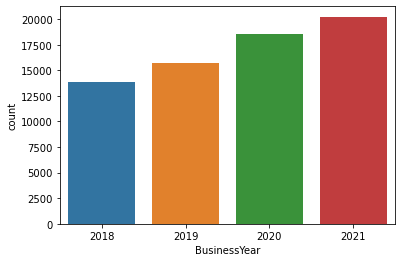

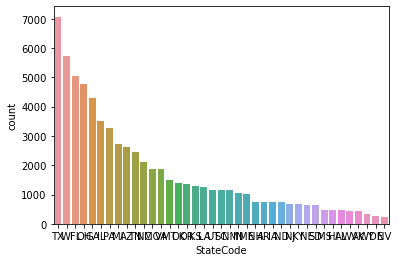

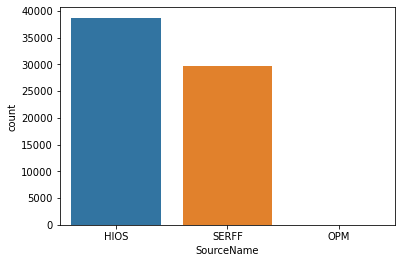

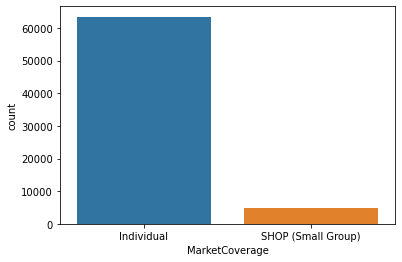

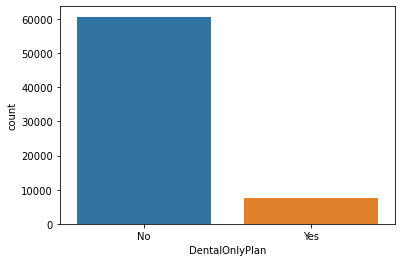

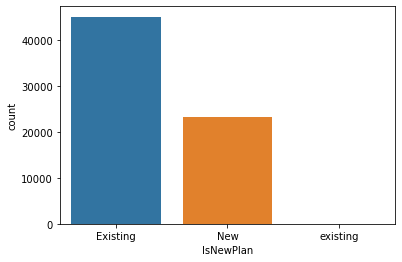

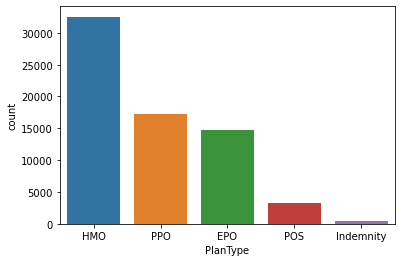

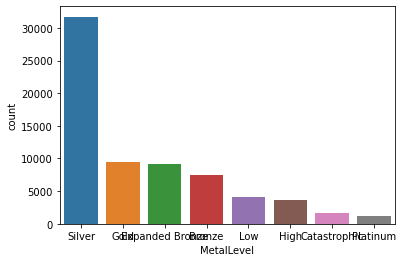

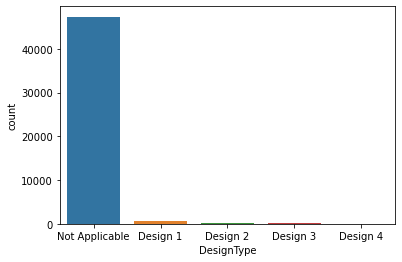

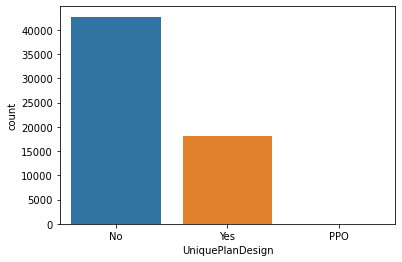

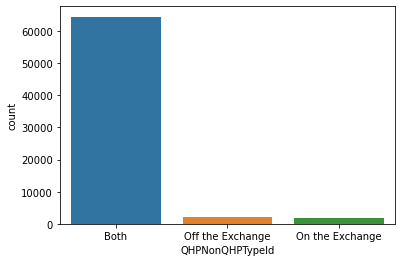

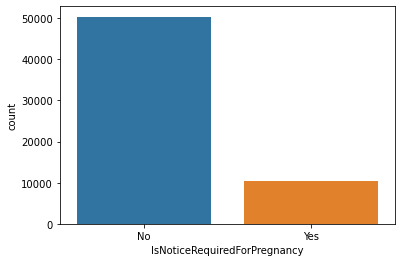

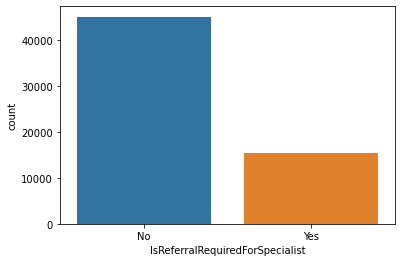

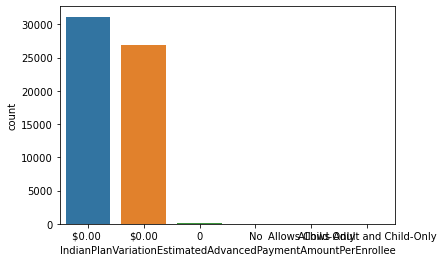

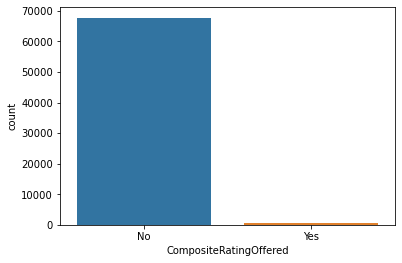

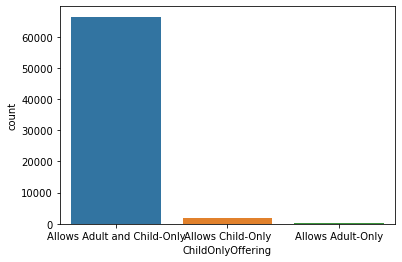

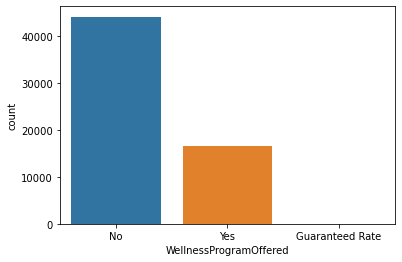

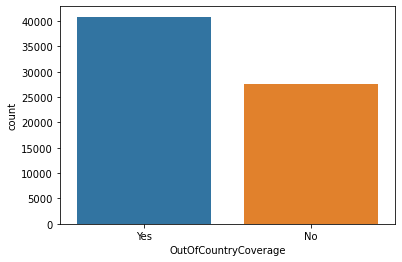

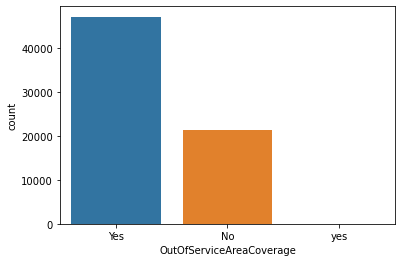

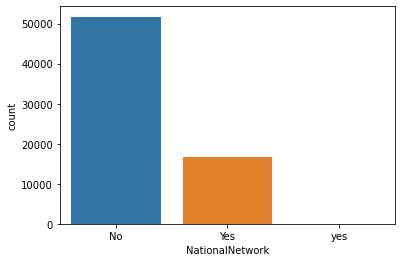

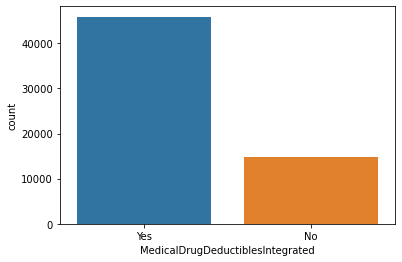

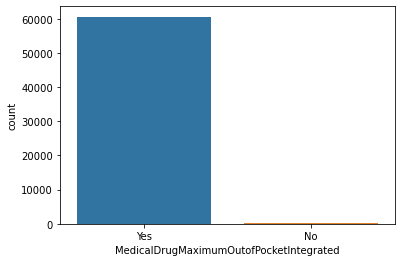

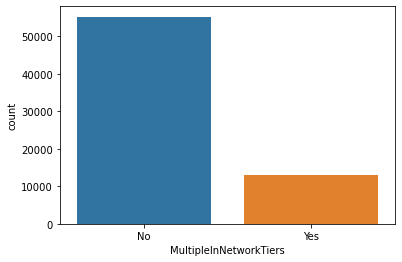

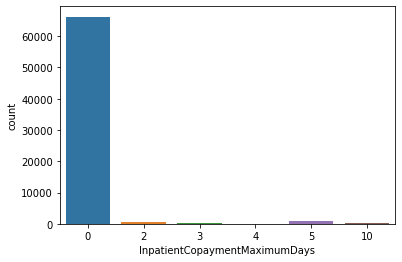

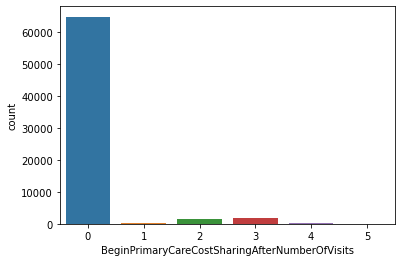

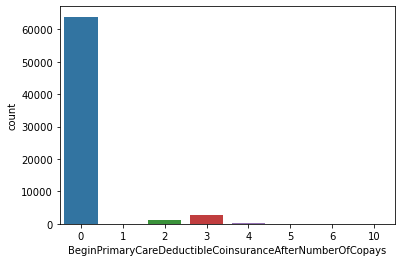

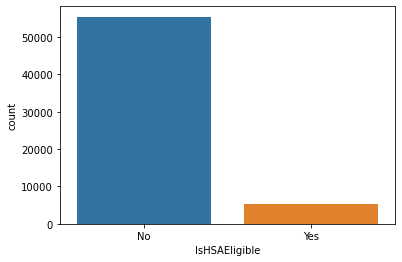

In [54]:
categorical_columns = ['BusinessYear', 'StateCode', 'SourceName', 
       'MarketCoverage', 'DentalOnlyPlan', 
        'IsNewPlan', 'PlanType', 'MetalLevel', 'DesignType',
       'UniquePlanDesign', 'QHPNonQHPTypeId', 'IsNoticeRequiredForPregnancy',
       'IsReferralRequiredForSpecialist',
       'IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee',
       'CompositeRatingOffered', 'ChildOnlyOffering', 'WellnessProgramOffered',
        'OutOfCountryCoverage',
        'OutOfServiceAreaCoverage',
        'NationalNetwork', 
        'MedicalDrugDeductiblesIntegrated',
       'MedicalDrugMaximumOutofPocketIntegrated', 'MultipleInNetworkTiers',
       'InpatientCopaymentMaximumDays',
       'BeginPrimaryCareCostSharingAfterNumberOfVisits',
       'BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays',
        'IsHSAEligible']
for i,c in enumerate(categorical_columns):
    Plan_cat = Plan[c].value_counts().to_frame().reset_index()
    Plan_cat.columns = [c,"count"]
    plt.figure(i)
    sns.barplot(Plan_cat[c],Plan_cat["count"])
    print(Plan[c].value_counts())
    print("------------------")

In [55]:
Plan.rename(columns={'TEHBDedInnTier1Coinsurance': 'TEHBDedInnTier1Coinsurance_Percent', 'FirstTierUtilization': 'FirstTierUtilization_Percent'}, inplace=True)

In [56]:
# Subset numerical columns in Plan dataset
d_cols = ['TEHBInnTier1IndividualMOOP', 'TEHBInnTier1FamilyPerPersonMOOP', 
       'TEHBInnTier1IndividualMOOP', 'TEHBInnTier1FamilyPerPersonMOOP',
       'TEHBInnTier1FamilyPerGroupMOOP', 'TEHBOutOfNetIndividualMOOP',
       'TEHBOutOfNetFamilyPerPersonMOOP', 'TEHBOutOfNetFamilyPerGroupMOOP',
       'TEHBCombInnOonIndividualMOOP', 'TEHBCombInnOonFamilyPerPersonMOOP',
       'TEHBCombInnOonFamilyPerGroupMOOP', 'TEHBDedInnTier1Individual',
       'TEHBDedInnTier1FamilyPerPerson', 'TEHBDedInnTier1FamilyPerGroup',
       'TEHBDedInnTier1Coinsurance_Percent','TEHBDedOutOfNetIndividual',
       'TEHBDedOutOfNetFamilyPerPerson', 'TEHBDedOutOfNetFamilyPerGroup',
       'TEHBDedCombInnOonIndividual', 'TEHBDedCombInnOonFamilyPerPerson',
       'TEHBDedCombInnOonFamilyPerGroup', 'FirstTierUtilization_Percent', 'SBCHavingaBabyDeductible',
       'SBCHavingaBabyCopayment', 'SBCHavingaBabyCoinsurance',
       'SBCHavingaBabyLimit', 'SBCHavingDiabetesDeductible',
       'SBCHavingDiabetesCopayment', 'SBCHavingDiabetesCoinsurance',
       'SBCHavingDiabetesLimit', 'SBCHavingSimplefractureDeductible',
       'SBCHavingSimplefractureCopayment',
       'SBCHavingSimplefractureCoinsurance', 'SBCHavingSimplefractureLimit'
      ]


In [57]:
# Remove characters and convert into numerical 
for x in d_cols:
  Plan[x] = Plan[x].str.replace(r'$', '')
  Plan[x]

for x in d_cols:
  Plan[x] = Plan[x].str.replace(r'per person', '')
  Plan[x]

for x in d_cols:
  Plan[x] = Plan[x].str.replace(r'per group', '')
  Plan[x]

for x in d_cols:
  Plan[x] = Plan[x].str.replace(r'%', '')
  Plan[x]

for x in d_cols:
  Plan[x] = Plan[x].str.strip()
  Plan[x]


Plan[d_cols] = Plan[d_cols].replace('not applicable', None, regex=True) 
# df[df['x'] <> "None" ]['x']).astype('int')
# df["A"] = pd.to_numeric(df["A"], downcast="float")

In [58]:
# Convert all none type to nan
Plan.fillna(value=np.nan, inplace=True)

In [59]:
# Function to convert all string number to float but nan
def f(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [60]:
# Convert all string number to float and change dtype to float
for x in d_cols:
  Plan[x] = Plan[x].apply(f)
  Plan[x]

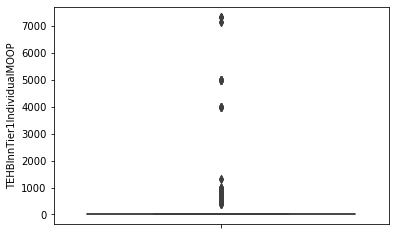

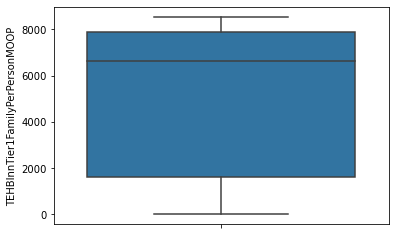

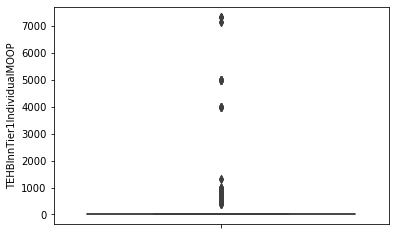

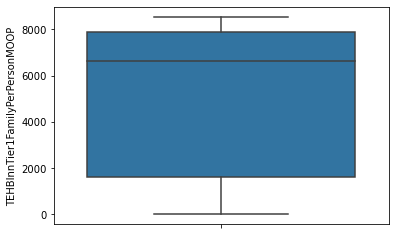

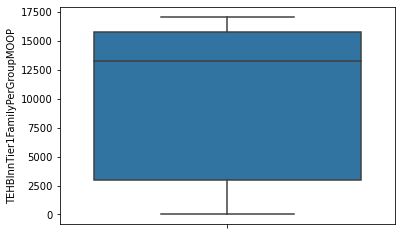

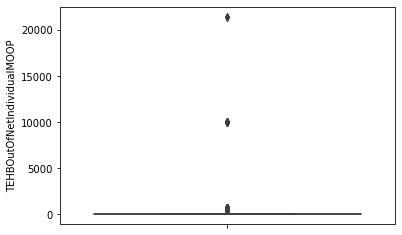

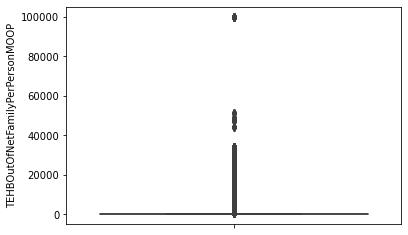

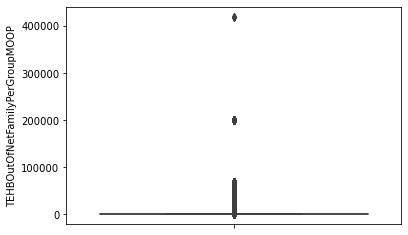

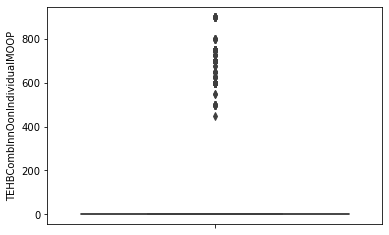

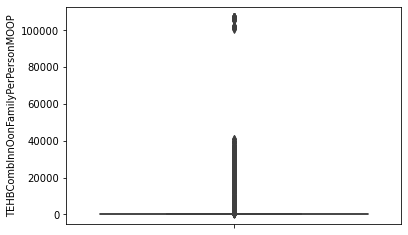

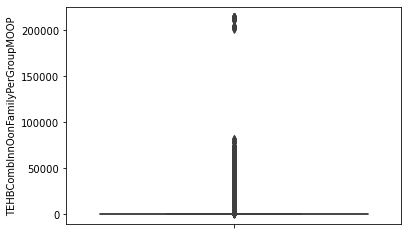

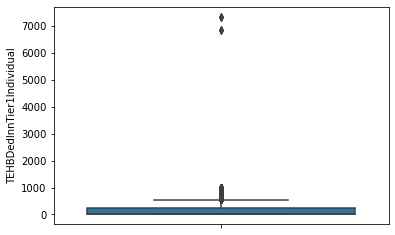

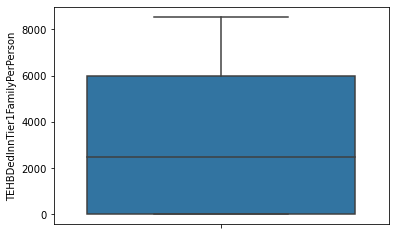

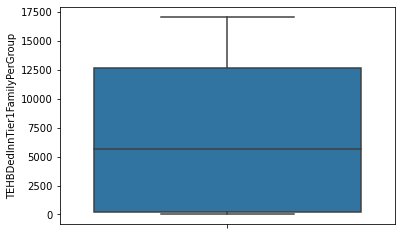

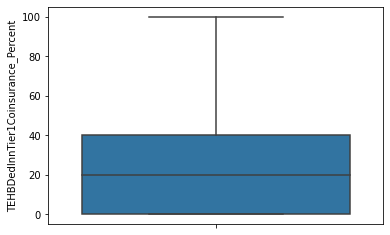

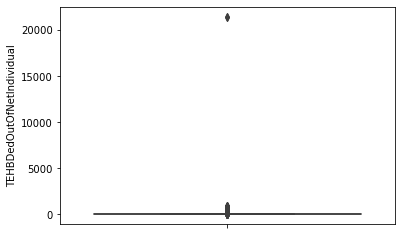

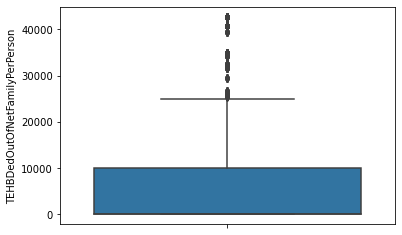

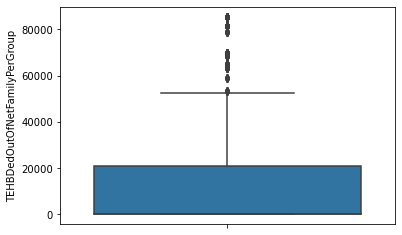

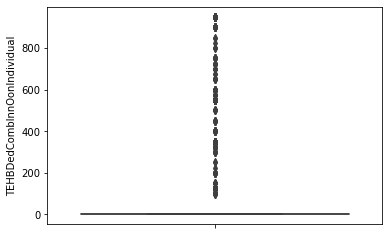

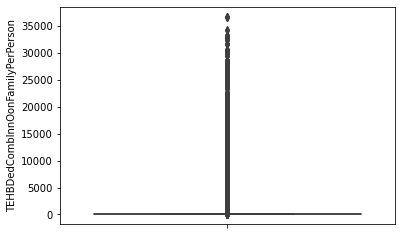

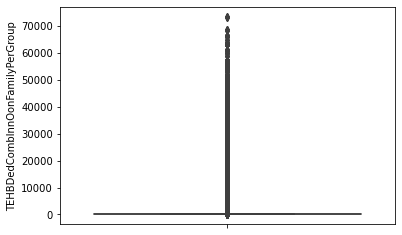

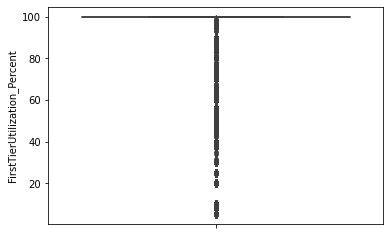

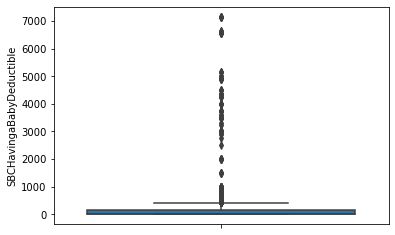

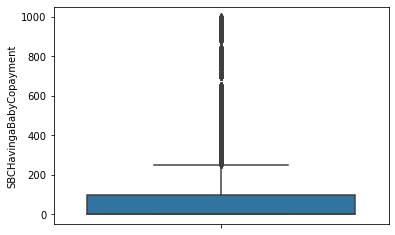

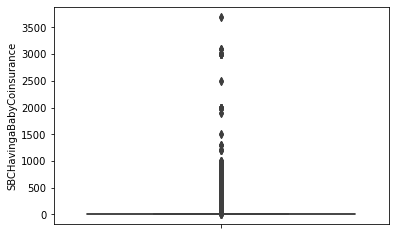

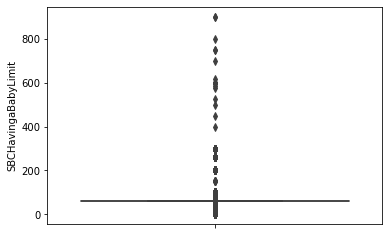

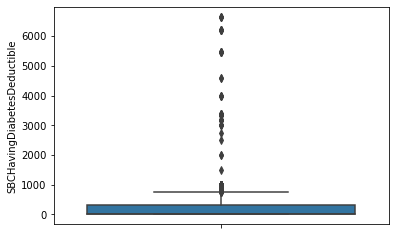

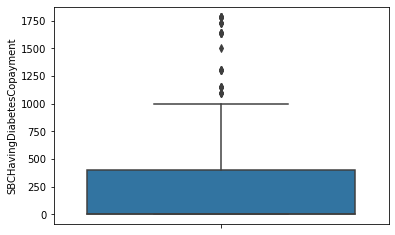

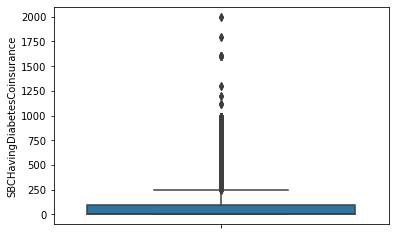

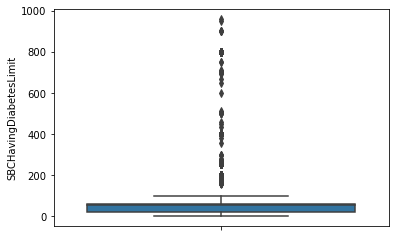

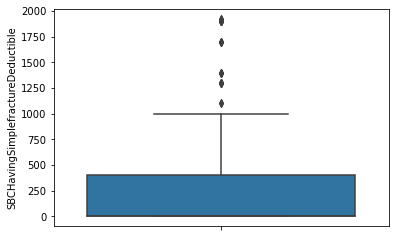

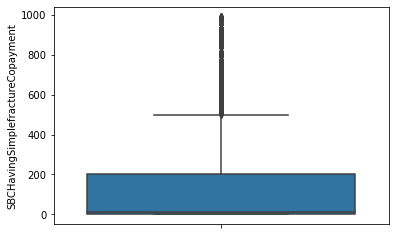

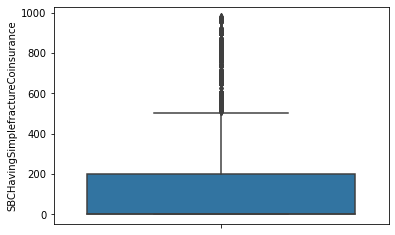

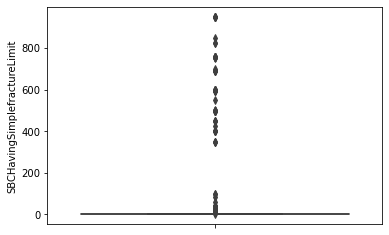

In [61]:
for i, col in enumerate(Plan[d_cols]):
    plt.figure(i)
    sns.boxplot(y=col, data=Plan)

In [62]:
# Drop numerical cols having nulls > 60%
Plan = Plan.dropna(thresh=Plan.shape[0]*0.6,how='all',axis=1)

In [63]:
num_cols = ['TEHBInnTier1IndividualMOOP', 'TEHBInnTier1FamilyPerPersonMOOP',
       'TEHBInnTier1IndividualMOOP', 'TEHBInnTier1FamilyPerPersonMOOP',
       'TEHBInnTier1FamilyPerGroupMOOP', 'TEHBOutOfNetIndividualMOOP',
       'TEHBOutOfNetFamilyPerPersonMOOP', 'TEHBOutOfNetFamilyPerGroupMOOP',
       'TEHBCombInnOonIndividualMOOP', 'TEHBCombInnOonFamilyPerPersonMOOP',
       'TEHBCombInnOonFamilyPerGroupMOOP', 'TEHBDedInnTier1Individual',
       'TEHBDedInnTier1FamilyPerPerson', 'TEHBDedInnTier1FamilyPerGroup',
       'TEHBDedInnTier1Coinsurance', 'TEHBDedOutOfNetIndividual',
       'TEHBDedOutOfNetFamilyPerPerson', 'TEHBDedOutOfNetFamilyPerGroup',
       'TEHBDedCombInnOonIndividual', 'TEHBDedCombInnOonFamilyPerPerson',
       'TEHBDedCombInnOonFamilyPerGroup', 'FirstTierUtilization', 'SBCHavingaBabyDeductible',
       'SBCHavingaBabyCopayment', 'SBCHavingaBabyCoinsurance',
       'SBCHavingaBabyLimit', 'SBCHavingDiabetesDeductible',
       'SBCHavingDiabetesCopayment', 'SBCHavingDiabetesCoinsurance',
       'SBCHavingDiabetesLimit', 'SBCHavingSimplefractureDeductible',
       'SBCHavingSimplefractureCopayment',
       'SBCHavingSimplefractureCoinsurance', 'SBCHavingSimplefractureLimit','CSRVariationType',
       'EHBPercentTotalPremium', 'AVCalculatorOutputNumber']


In [64]:
Plan2 = Plan['OutOfCountryCoverageDescription'].astype(str).reset_index()

In [65]:
Plan2 = Plan2.loc[Plan2['OutOfCountryCoverageDescription'].str.contains(r'nan') == False]
# Plan2.drop(Plan2[Plan2.OutOfCountryCoverageDescription.str.contains(r'nan')].index)

In [66]:
Plan2.shape

(48931, 2)

In [67]:
text = " ".join(review for review in Plan2.OutOfCountryCoverageDescription)
print ("There are {} words in the combination of all OutOfCountryCoverageDescription.".format(len(text)))

There are 3870938 words in the combination of all OutOfCountryCoverageDescription.


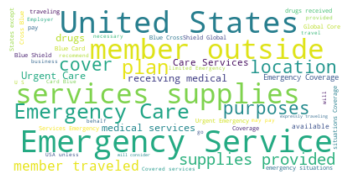

In [68]:
# Create and generate a word cloud image:
wordcloud = WordCloud( max_words=50, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Benefits

2021    1338319
2020    1182666
2019     967050
2018     829652
Name: BusinessYear, dtype: int64
------------------
TX    475179
WI    389464
FL    350399
OH    289917
GA    278377
IL    227357
PA    209309
AZ    168054
MI    155573
TN    153684
NC    139667
MO    115204
VA    106977
MT     91532
OR     86215
KS     82274
OK     81939
LA     79367
NM     73232
SC     71180
UT     69372
ME     69244
AR     54475
IN     53959
NH     48391
IA     42255
ND     41446
KY     40943
SD     37967
NE     33841
NJ     32901
WV     29297
HI     28365
MS     27898
AL     21841
AK     19396
WY     17217
DE     12840
NV     11139
Name: StateCode, dtype: int64
------------------
HIOS     2495426
SERFF    1820389
OPM         1872
Name: SourceName, dtype: int64
------------------
Yes    3231703
Name: IsEHB, dtype: int64
------------------
Covered        3362712
Not Covered     775370
NOT COVERED         11
Name: IsCovered, dtype: int64
------------------
No     3513173
Yes      81067
Name: IsExclFromInn

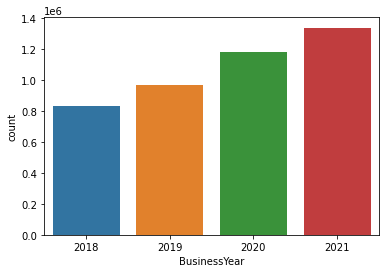

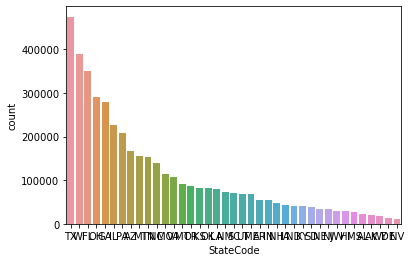

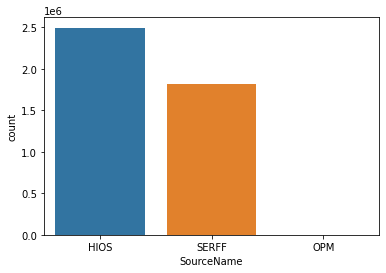

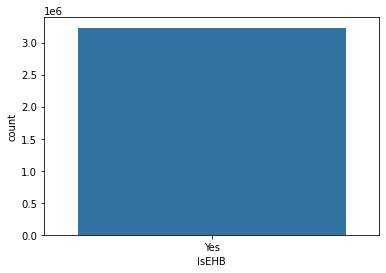

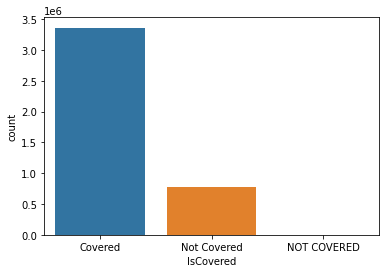

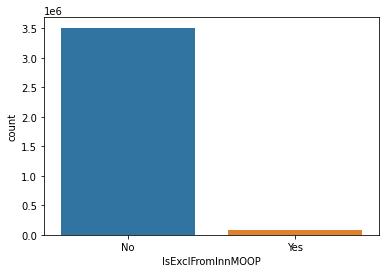

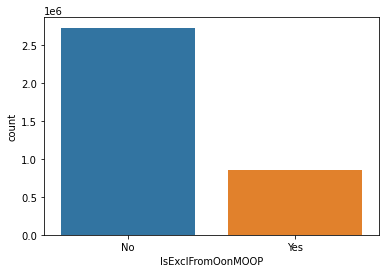

In [69]:
#IssuerId, ImportDate, PlanId, StandardComponentId, 'CopayInnTier1','CopayOutofNet', 'CopayInnTier2', 'CopayOutofNet', 'BenefitName',
categorical_columns = ['BusinessYear', 'StateCode', 'SourceName', 'IsEHB', 'IsCovered',
       'IsExclFromInnMOOP', 'IsExclFromOonMOOP']
for i,c in enumerate(categorical_columns):
    Benefits_cat = Benefits[c].value_counts().to_frame().reset_index()
    Benefits_cat.columns = [c,"count"]
    plt.figure(i)
    sns.barplot(Benefits_cat[c],Benefits_cat["count"])
    print(Benefits[c].value_counts())
    print("------------------")

### 3. Rate

2018    2287807
2021    2136450
2019    1968926
2020    1886351
Name: BusinessYear, dtype: int64
------------------
FL    1385508
MI     878354
OH     771302
WI     663821
TX     516995
SC     508674
IN     390524
IL     374338
GA     362305
NC     270504
VA     219132
MT     213996
AL     160626
PA     143049
MO     137228
LA     115872
TN     101516
NJ      82065
AZ      79365
UT      76878
IA      72114
OR      71247
KS      66708
WV      64872
AR      60894
OK      57075
KY      53103
ME      52817
AK      51478
ND      48501
MS      43452
NM      39423
NE      37638
SD      34100
NH      27650
WY      21114
NV      11934
HI       7752
DE       5610
Name: StateCode, dtype: int64
------------------
HIOS     4947379
SERFF    3330370
OPM         1785
Name: SourceName, dtype: int64
------------------
2021-01-01    1749663
2018-01-01    1683742
2020-01-01    1526006
2019-01-01    1525493
2018-07-01     204678
2018-10-01     199672
2018-04-01     199672
2019-07-01     151177
2019-04-01  

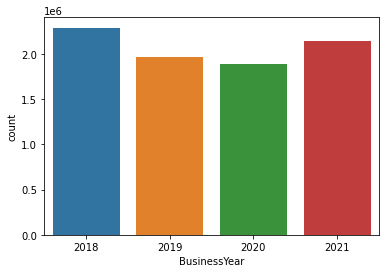

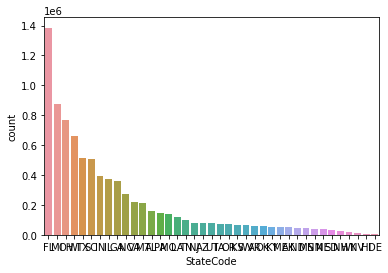

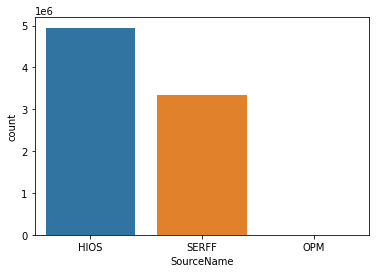

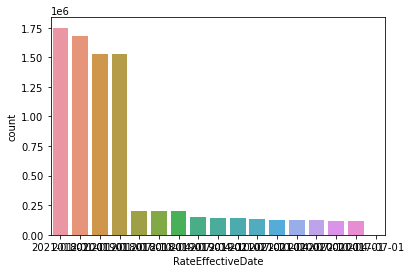

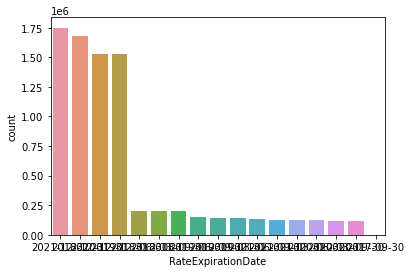

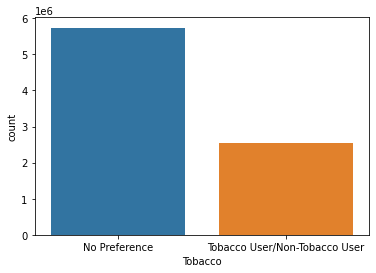

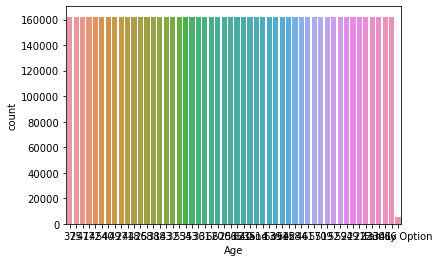

In [70]:
# IssuerId, ImportDate, 'PlanId', 'FederalTIN','RatingAreaId',
categorical_columns = ['BusinessYear', 'StateCode', 'SourceName', 'RateEffectiveDate', 'RateExpirationDate',
        'Tobacco', 'Age']
for i,c in enumerate(categorical_columns):
    Rate_cat = Rate[c].value_counts().to_frame().reset_index()
    Rate_cat.columns = [c,"count"]
    plt.figure(i)
    sns.barplot(Rate_cat[c],Rate_cat["count"])
    print(Rate[c].value_counts())
    print("------------------")

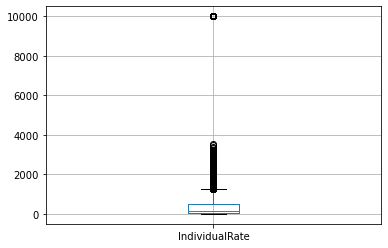

In [71]:
#ourlier 10000
Rate.boxplot(column='IndividualRate')
plt.show()

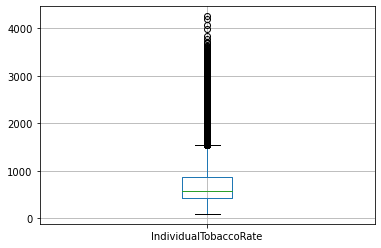

In [72]:
Rate.boxplot(column='IndividualTobaccoRate')
plt.show()

In [73]:
Rate.describe()

BusinessYear      IssuerId  IndividualRate  IndividualTobaccoRate
count  8.279534e+06  8.279534e+06    8.279534e+06           2.536332e+06
mean   2.019468e+03  5.006317e+04    3.432215e+02           6.944750e+02
std    1.147899e+00  2.809670e+04    6.297048e+02           3.832198e+02
min    2.018000e+03  1.004600e+04    0.000000e+00           9.190000e+01
25%    2.018000e+03  2.606500e+04    2.472000e+01           4.204400e+02
50%    2.019000e+03  4.104700e+04    1.486300e+02           5.848000e+02
75%    2.021000e+03  7.735200e+04    5.190600e+02           8.724200e+02
max    2.021000e+03  9.996900e+04    9.999000e+03           4.255570e+03

In [74]:
# Drop outlier = 9999
Rate = Rate[Rate.IndividualRate != 9999]

### 4. Business

In [75]:
business_cat_col = ['BusinessYear', 'StateCode',  'SourceName',  
                    'TwoParentFamilyMaxDependentsRule',
       'SingleParentFamilyMaxDependentsRule', 'DependentMaximumAgRule',
       'ChildrenOnlyContractMaxChildrenRule', 'SameSexPartnerAsSpouseIndicator',
       'DomesticPartnerAsSpouseIndicator', 
       'MinimumTobaccoFreeMonthsRule',
       'MarketCoverage', 'DentalOnlyPlan']


In [76]:
# Function for countplot
def countplot(col, dt):
  sns.countplot(x =col, data= dt)


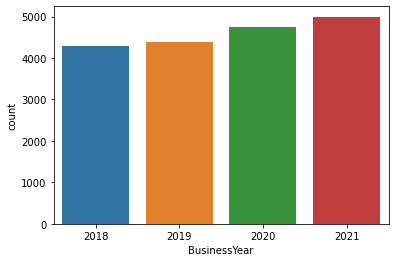

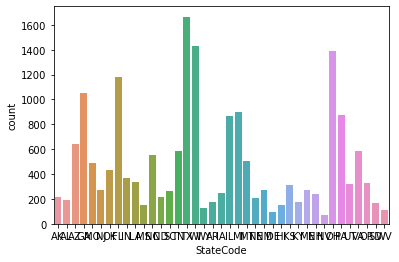

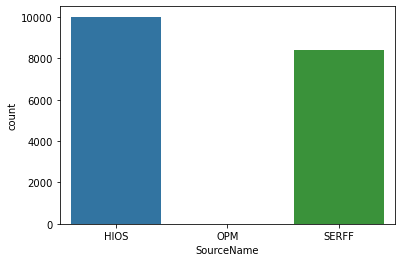

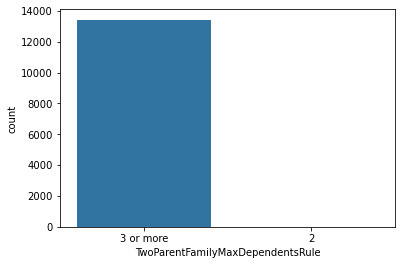

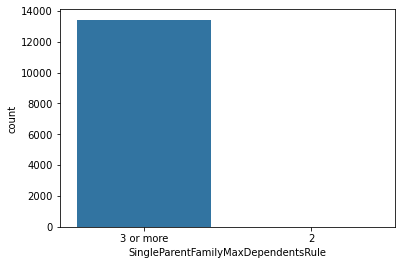

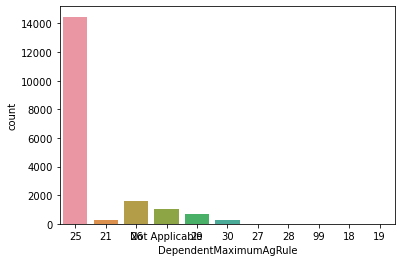

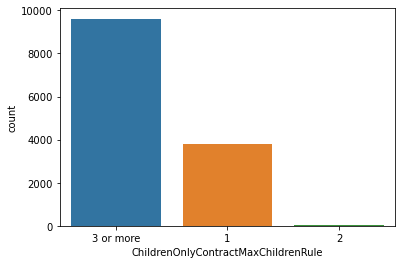

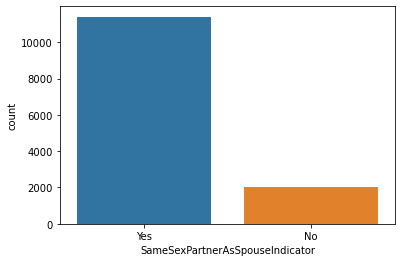

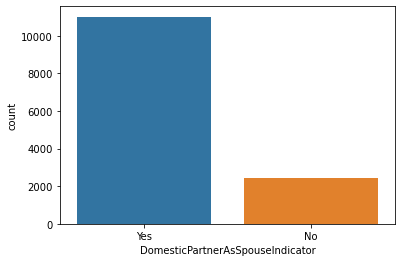

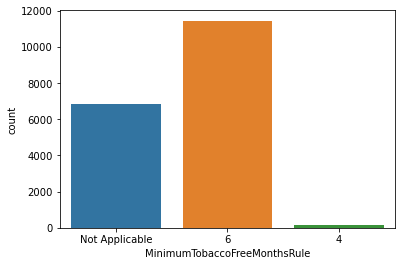

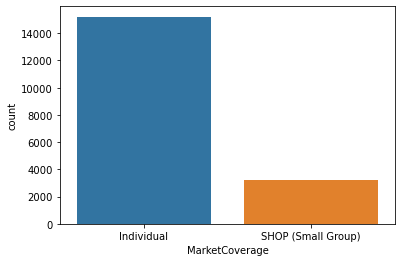

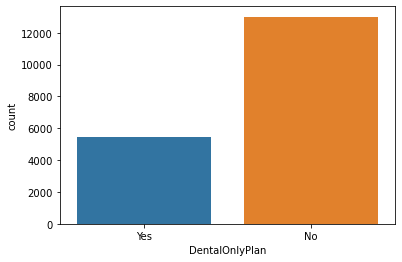

In [77]:
for i, x in enumerate(business[business_cat_col]):
  plt.figure(i)
  countplot(x, business)

### 5. Network

In [78]:
network_cat_col = ['BusinessYear', 'StateCode', 'SourceName', 'MarketCoverage', 'DentalOnlyPlan']

2021    20236
2020    18574
2019    15690
2018    13857
Name: BusinessYear, dtype: int64
------------------
TX    7071
WI    5713
FL    5044
OH    4784
GA    4285
IL    3495
PA    3273
MI    2717
AZ    2623
TN    2449
NC    2113
MO    1862
VA    1861
MT    1496
OK    1402
OR    1374
KS    1290
LA    1255
UT    1158
SC    1148
NM    1138
IN    1054
ME    1027
NH     761
AR     759
IA     744
ND     729
NJ     669
KY     662
NE     641
SD     629
MS     473
HI     473
AL     462
WV     448
AK     428
WY     347
DE     273
NV     227
Name: StateCode, dtype: int64
------------------
HIOS     38699
SERFF    29634
OPM         24
Name: SourceName, dtype: int64
------------------
Individual            63455
SHOP (Small Group)     4902
Name: MarketCoverage, dtype: int64
------------------
No     60705
Yes     7652
Name: DentalOnlyPlan, dtype: int64
------------------


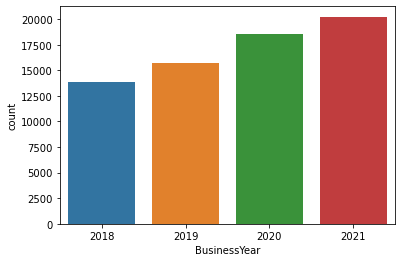

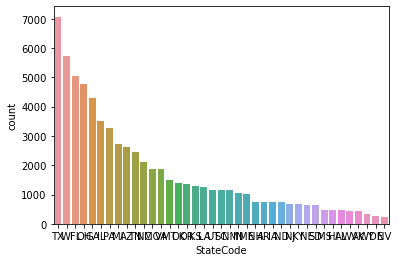

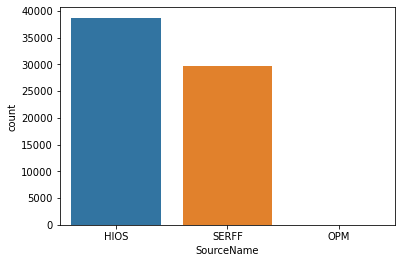

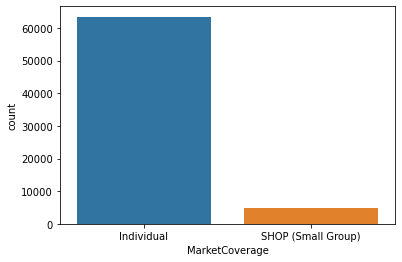

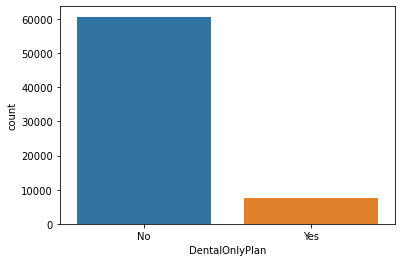

In [79]:
for i,c in enumerate(network_cat_col):
    Plan_cat = Plan[c].value_counts().to_frame().reset_index()
    Plan_cat.columns = [c,"count"]
    plt.figure(i)
    sns.barplot(Plan_cat[c],Plan_cat["count"])
    print(Plan[c].value_counts())
    print("------------------")

### 6. Service

In [80]:
service_cat_cols = ['BusinessYear', 'StateCode', 'SourceName', 'CoverEntireState', 'PartialCounty', 'MarketCoverage', 'DentalOnlyPlan']

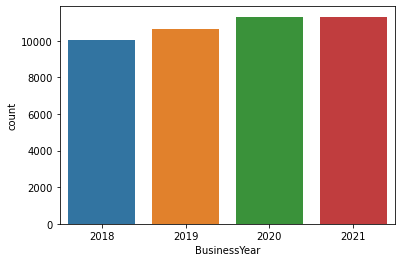

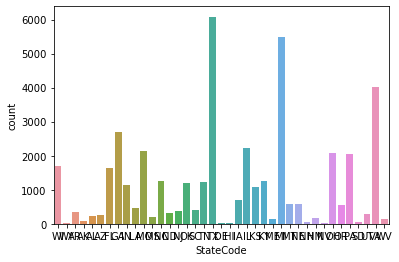

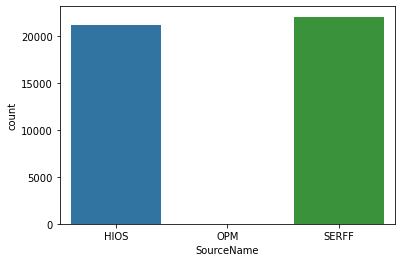

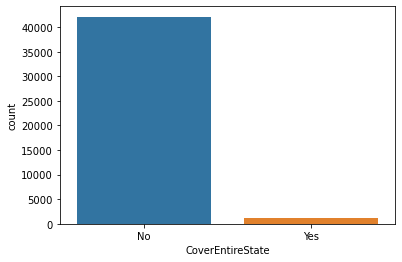

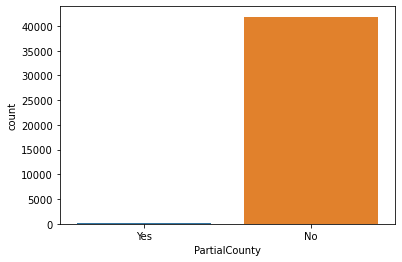

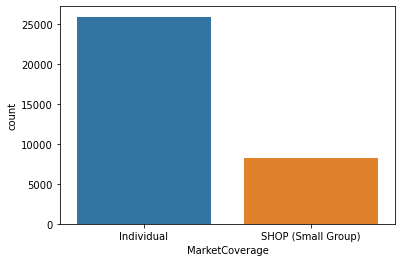

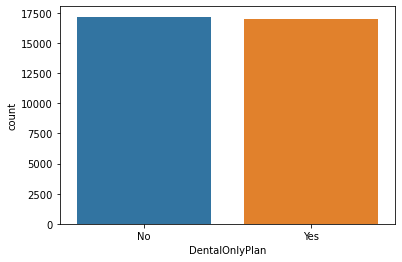

In [81]:
for i, x in enumerate(service[service_cat_cols]):
  plt.figure(i)
  countplot(x, service)

## **Multi-variate**

In [82]:
Rate.corr()

BusinessYear  IssuerId  IndividualRate  \
BusinessYear               1.000000 -0.015119        0.054476   
IssuerId                  -0.015119  1.000000       -0.117686   
IndividualRate             0.054476 -0.117686        1.000000   
IndividualTobaccoRate     -0.031161 -0.101804        0.991254   

                       IndividualTobaccoRate  
BusinessYear                       -0.031161  
IssuerId                           -0.101804  
IndividualRate                      0.991254  
IndividualTobaccoRate               1.000000

### Time/ Individual Rate

In [83]:
# Convery ImportDate into datatime type
Plan['ImportDate'] = pd.to_datetime(Plan['ImportDate'])

In [84]:
# Create year, month, date columns
Plan['year'] = Plan['ImportDate'].dt.year
Plan['month'] = Plan['ImportDate'].dt.month
Plan['day'] = Plan['ImportDate'].dt.day

In [85]:
Rate['ImportDate'] = pd.to_datetime(Rate['ImportDate'])

In [86]:
# Create year, month, date columns
Rate['year'] = Rate['ImportDate'].dt.year
Rate['month'] = Rate['ImportDate'].dt.month
Rate['day'] = Rate['ImportDate'].dt.day

In [87]:
Rate['ImportDate'] = pd.to_datetime(Rate.ImportDate, format='%Y/%m/%d')

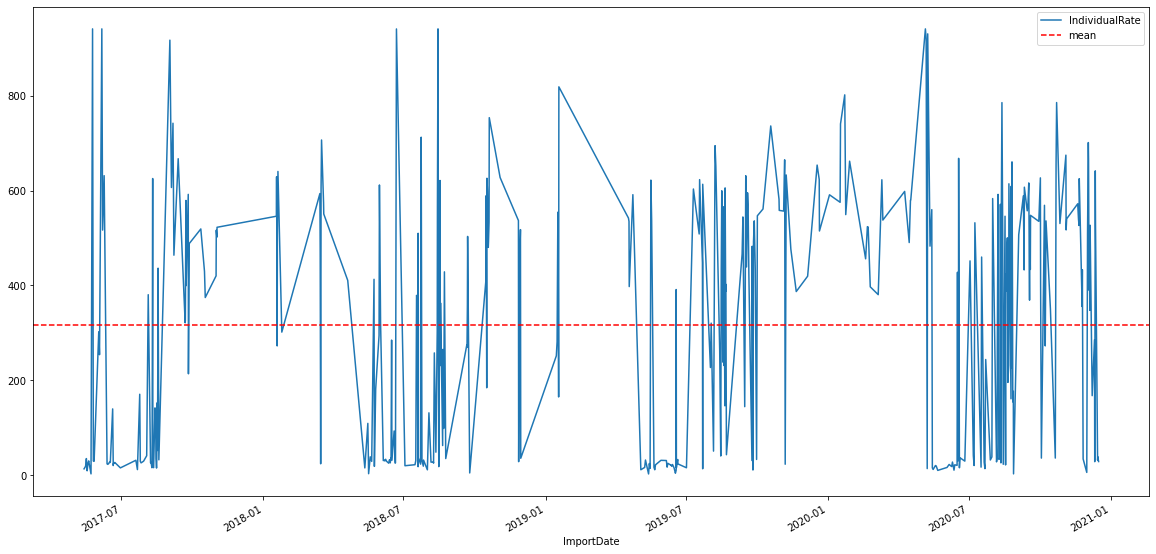

In [88]:
a = Rate.groupby(['ImportDate']).mean()['IndividualRate']
mean = Rate['IndividualRate'].mean()
a.plot(legend=True, figsize=(20,10))
plt.axhline(mean, color='r', linestyle='--', label = 'mean')
plt.legend()
plt.show()

Finding: seasonality is obvious through 2017 to 2020. Winter peiord has higher rate and summer peiord has lower rate.

Text(0.5, 1.0, 'Avg of IndividualRate across Years')

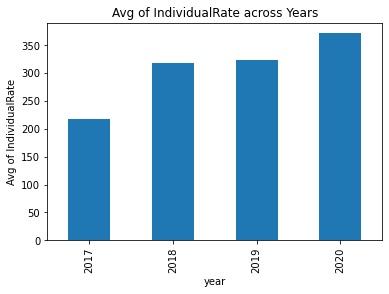

In [89]:
avg = Rate.groupby(Rate["year"]).mean()['IndividualRate']
ax = avg.plot(kind = 'bar')
ax.set_ylabel('Avg of IndividualRate') 
ax.set_title('Avg of IndividualRate across Years')

Finding: rate grow over 2017 to 2020, but grow rapidly from 2019 to 2020. 

### Average Insurance Rate of Provider having no preference on smoking

Text(0.5, 1.0, 'Avg of Individual Rate for Provider-not-consider-smoking across Years')

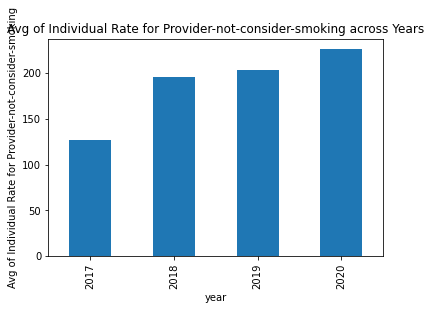

In [90]:
#focus on data that provider don't care if subscriber use tobacco or not.
Rate2 = Rate.loc[Rate['Tobacco'] == 'No Preference']
avg = Rate2.groupby(Rate2["year"]).mean()['IndividualRate']
ax = avg.plot(kind = 'bar')
ax.set_ylabel('Avg of Individual Rate for Provider-not-consider-smoking') 
ax.set_title('Avg of Individual Rate for Provider-not-consider-smoking across Years')

Finding: similar pattern as data without filter tobacco used.

### Average Insurance Rate for Smoker over year

Text(0.5, 1.0, 'Avg of Individual Rate for Smoker across Years')

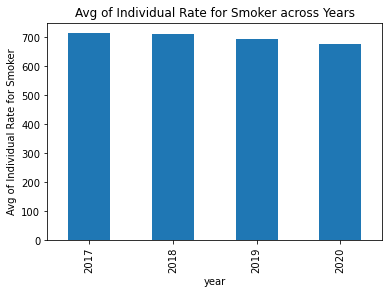

In [91]:
Rate3 = Rate.loc[Rate['Tobacco'] == 'Tobacco User/Non-Tobacco User']
avg = Rate3.groupby(Rate3["year"]).mean()['IndividualTobaccoRate']
ax = avg.plot(kind = 'bar')
ax.set_ylabel('Avg of Individual Rate for Smoker') 
ax.set_title('Avg of Individual Rate for Smoker across Years')

Finding: Interesting finding, for provider care tobacco use, the rate for smoker decease over time.

### Average Individual Rate for Non-smoker over year

Text(0.5, 1.0, 'Avg of Individual Rate for Non-smoker across Years')

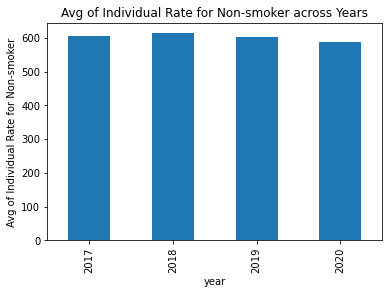

In [92]:
Rate3 = Rate.loc[Rate['Tobacco'] == 'Tobacco User/Non-Tobacco User']
avg = Rate3.groupby(Rate3["year"]).mean()['IndividualRate']
ax = avg.plot(kind = 'bar')
ax.set_ylabel('Avg of Individual Rate for Non-smoker') 
ax.set_title('Avg of Individual Rate for Non-smoker across Years')

Finding: for provider care tobacco use, the rate for non-smoker decease as well.

Text(0.5, 1.0, 'Avg of IndividualRate across Months')

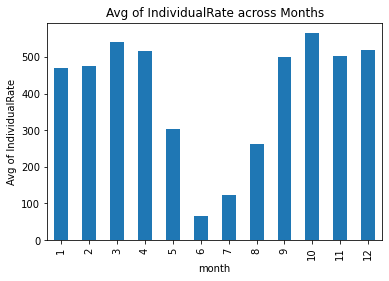

In [93]:
avg = Rate.groupby(Rate["month"]).mean()['IndividualRate']
ax = avg.plot(kind = 'bar')
ax.set_ylabel('Avg of IndividualRate') 
ax.set_title('Avg of IndividualRate across Months')

Finding: rate is lower in May through August.

### Tobacco User/ Individual Rate

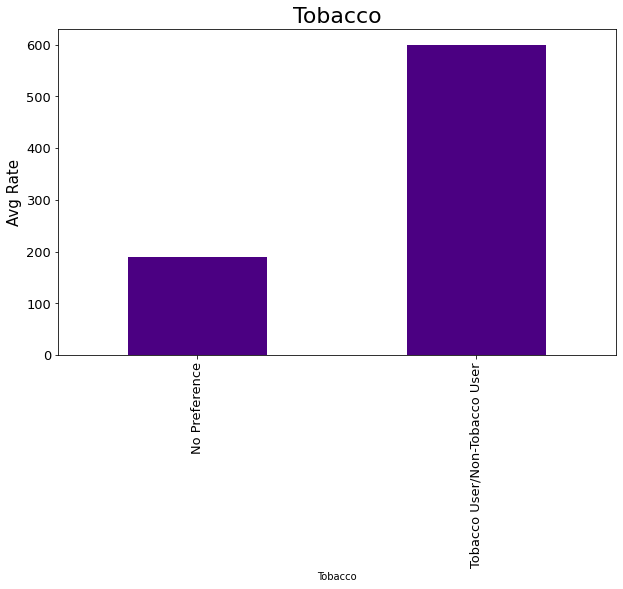

In [94]:
Rate_avg = Rate.groupby(['Tobacco'])['IndividualRate'].mean()

ax = Rate_avg.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Tobacco", fontsize=22)
ax.set_ylabel("Avg Rate", fontsize=15);
plt.show()

<AxesSubplot:xlabel='Tobacco'>

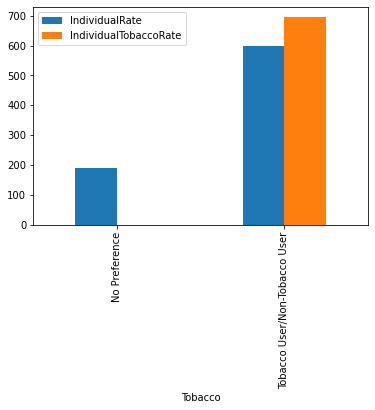

In [95]:
Rate.groupby(['Tobacco'])['IndividualRate','IndividualTobaccoRate'].mean().plot.bar()

### State/ Individual Rate

<AxesSubplot:xlabel='StateCode'>

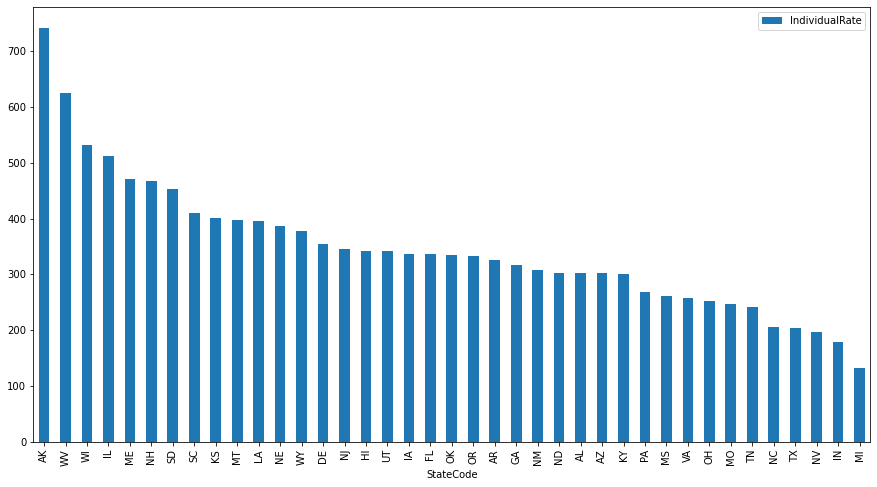

In [96]:
Rate.groupby(['StateCode'])['IndividualRate'].mean().sort_values(ascending=False).plot.bar(legend=True, figsize=(15,8))

### State/Individual Rate Map

In [97]:
x = Rate.groupby(['StateCode'])['IndividualRate'].mean().reset_index()
x

fig = px.choropleth(Rate,  
                    locations= x['StateCode'],  
                    color=x['IndividualRate'],  
                    hover_name=x['IndividualRate'],
                    locationmode = 'USA-states') 
fig.update_layout(
    title_text = 'Individual Rate (Non-smokers) by State',
    geo_scope='usa',  
)
fig.show()

In [98]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
x = Rate.groupby(['StateCode'])['IndividualRate'].mean().reset_index()

data = dict(type = 'choropleth',
           locations = x['StateCode'],
           locationmode = 'USA-states',
           #colorscale = 'YIOrRd',
            text = x['StateCode'],
            marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
           z = x['IndividualRate'],
           colorbar = {'title':'Insurance Rate'})

layout = dict(title = 'Rate across state',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

map = go.Figure(data = [data],layout=layout)
iplot(map)

In [99]:
# AK, WV, WI has the highest rate

### Age/ Individual Rate (No Tobacco Preference only)

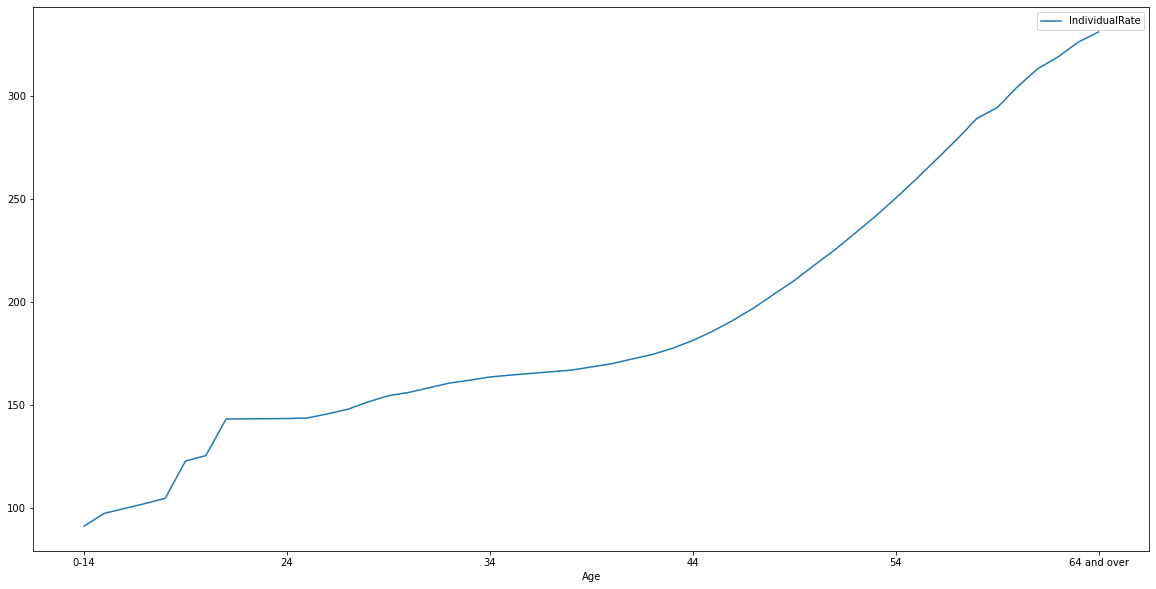

In [100]:
tob = Rate[Rate['Tobacco'] == 'No Preference']
ax = tob.groupby([tob["Age"]]).mean()[['IndividualRate']].plot(legend=True, figsize=(20,10))
ax.legend(['IndividualRate'])

### Age/ Individual Rate vs. Age/ Individual Tobacco Rate

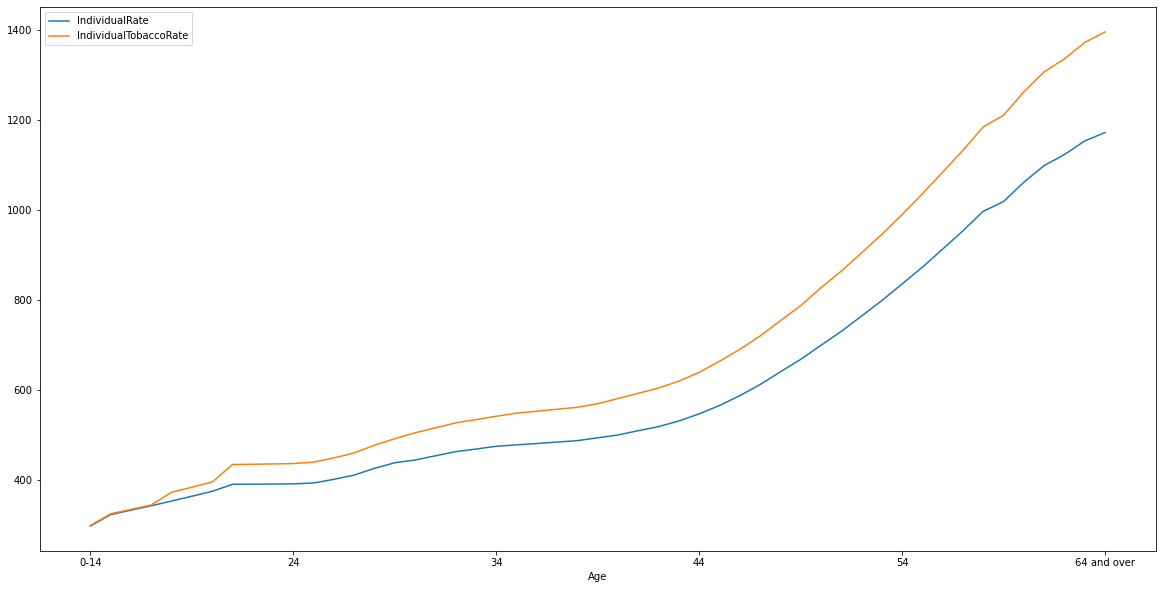

In [101]:
tob = Rate[Rate['Tobacco'] == 'Tobacco User/Non-Tobacco User']
ax = tob.groupby([tob["Age"]]).mean()[['IndividualRate','IndividualTobaccoRate']].plot(legend=True, figsize=(20,10))
ax.legend(['IndividualRate', 'IndividualTobaccoRate'])

Rate variance between Tobacco user and Non-tobacco user is getting large along with different age group.

### Benefits Analysis

In [102]:
Benefits[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                 
                   count unique                top   freq
BusinessYear                                             
2018              829652    252  Accidental Dental  13857
2019              967050    244  Accidental Dental  15695
2020             1182666    274  Accidental Dental  18574
2021             1338319    271  Accidental Dental  20236

In [103]:
Benefits[["StateCode","BenefitName"]].groupby('StateCode').describe()

BenefitName                                              
                count unique                              top  freq
StateCode                                                          
AK              19396     68     Dental Check-Up for Children   428
AL              21841     95     Dental Check-Up for Children   462
AR              54475     96        Basic Dental Care - Child   759
AZ             168054    124                Accidental Dental  2623
DE              12840     72     Dental Check-Up for Children   273
FL             350399    134                Accidental Dental  5044
GA             278377    117              Orthodontia - Adult  4285
HI              28365    100     Dental Check-Up for Children   473
IA              42255     93        Basic Dental Care - Child   744
IL             227357    152  Routine Dental Services (Adult)  3495
IN              53959     86     Dental Check-Up for Children  1054
KS              82274     87                Accidental Dental  1290
KY              40943    119     Dental Check-Up for Children   662
LA              79367    103        Major Dental Care - Adult  1255
ME              69244    101        Major Dental Care - Adult  1027
MI             155573    146  Routine Dental Services (Adult)  2717
MO             115204    120  Routine Dental Services (Adult)  1862
MS              27898    104     Dental Check-Up for Children   473
MT              91532     73        Major Dental Care - Child  1496
NC             139667     99        Major Dental Care - Child  2113
ND              41446     69  Routine Dental Services (Adult)   734
NE              33841     68     Dental Check-Up for Children   641
NH              48391     93        Major Dental Care - Adult   761
NJ              32901     84     Dental Check-Up for Children   669
NM              73232     85     Dental Check-Up for Children  1138
NV              11139     72     Dental Check-Up for Children   227
OH             289917     85                Accidental Dental  4784
OK              81939     69                Accidental Dental  1402
OR              86215     97                Accidental Dental  1374
PA             209309    120                Accidental Dental  3273
SC              71180     81        Basic Dental Care - Child  1148
SD              37967     68     Dental Check-Up for Children   629
TN             153684    120              Orthodontia - Child  2449
TX             475179    124                Accidental Dental  7071
UT              69372     72        Major Dental Care - Adult  1158
VA             106977     82                Accidental Dental  1861
WI             389464    122                Accidental Dental  5713
WV              29297     75     Dental Check-Up for Children   448
WY              17217     68     Dental Check-Up for Children   347

Dental care is the most common benefit for most of states

### BenefitName Word Cloud

In [104]:
text = " ".join(review for review in Benefits.BenefitName)
print ("There are {} words in the combination of all BenefitName.".format(len(text)))

There are 123998868 words in the combination of all BenefitName.


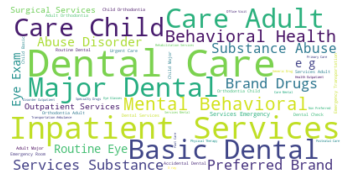

In [105]:
# Create and generate a word cloud image:
wordcloud = WordCloud( max_words=50, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most common benefits: 1. Dental Care 2. Inpatient Services 3. Mental/Behavioral care

### Network Analysis

In [106]:
x = network[["StateCode","NetworkName"]].groupby('StateCode').head(2).reset_index()


fig = px.choropleth(network,  
                    locations= x['StateCode'],  
                    color=x['NetworkName'],  
                    hover_name=x['NetworkName'],
                    locationmode = 'USA-states') 
fig.update_layout(
    title_text = 'Top Network Name by State', 
    geo_scope='usa',  
)
fig.show()

### Service Analysis

In [109]:
x = service[["StateCode","PartialCounty"]].reset_index()
x = x[["StateCode","PartialCounty"]].dropna().reset_index()

fig = px.choropleth(service,  
                    locations= x['StateCode'],  
                    color=x['PartialCounty'],  
                    hover_name=x['PartialCounty'],
                    locationmode = 'USA-states') 
fig.update_layout(
    title_text = 'Whether Entire County is Covered by the Service Area', 
    geo_scope='usa',  
)
fig.show()

### Plan Analysis

In [110]:
list_all(Plan.dtypes)

BusinessYear                                                             int64
StateCode                                                               object
IssuerId                                                                 int64
SourceName                                                              object
ImportDate                                                      datetime64[ns]
MarketCoverage                                                          object
DentalOnlyPlan                                                          object
TIN                                                                     object
StandardComponentId                                                     object
PlanMarketingName                                                       object
HIOSProductId                                                           object
NetworkId                                                               object
ServiceAreaId                                       

In [111]:
x = Plan[["StateCode","PlanVariantMarketingName"]].groupby('StateCode').head(2).reset_index()


fig = px.choropleth(Plan,  
                    locations= x['StateCode'],  
                    color=x['PlanVariantMarketingName'],  
                    hover_name=x['PlanVariantMarketingName'],
                    locationmode = 'USA-states') 
fig.update_layout(
    title_text = 'Top PlanVariantMarketingName Name by State', 
    geo_scope='usa',  
)
fig.show()

In [112]:
Plan['OutOfCountryCoverageDescription'].value_counts()

Emergency Only                                                                                                                                                                                                         7515
This plan does not cover any services and/or supplies provided to a member outside of the United States, if the member traveled to the location for the purposes of receiving medical services, supplies, or drugs.    5467
Emergency Services Only                                                                                                                                                                                                3613
Emergency Services                                                                                                                                                                                                     2387
Urgent/Emergency Coverage Only                                                                                          

# Compelling Findings

- Rate
1. The monthly individual health insurance rates slightly **increased** over years from 2017 to 2020.
2. There is significant growth in the average individual health insurance rate from 2019 to 2020. The average insurance rate increased by **14.8%** from **2019 to 2020**. 
3. Compare to the health insurance provider that doesn't care about tobacco use, health insurance providers that care about tobacco use provide a **higher** insurance rate for either smokers or non-smoker.
4. Insurance rate and variance of rate between smoker and non-smoker **increase over the age**.
5. From the age over **45**, the variance of insurance between smoker and non-smoker significantly **increased**, which indicated that over age 45 of the smoker with higher risk to get cancer and death rate.
6. Alaska and West Virginia have the highest monthly health insurance premiums costing over **$620 monthly**.


- Benefits
1. The most common benefit in the U.S. is **Dental Health**, which indicates dental coverage is an **"essential benefit"**. This is might be related to the state law or ACA (Affordable Care Act) policies.
2. Illinois, Michigan, and Wisconsin, and Florida lead the nation with the largest kinds of health insurance benefits.

# Conclusion

There are many factors that might affect a plan's monthly premium such as location, age, tobacco use, plan category, and whether the plan covers dependents. In this analysis project, we focus on the location, age, and tobacco use to analyze the current healthcare insurance market. The insurance rate varies by state, in general, the west coast has a higher insurance rate. The possible explanation could be taxation or a unique system shared among west coast states. In addition, age starts from 45, the variance of insurance between smoker and non-smoker significantly increased, which indicated that over age 45 of the smoker with higher risk to get cancer and death rate.

The average insurance rate increased by 0.7% from 2018 to 2019. In contrast, the average insurance rate increased by 14.8% from 2019 to 2020. In 2020, COVID-19 impact the health insurance market. The most common factors driving up health costs in 2020 and the future were the continued cost of COVID-19 testing, the potential for widespread vaccination. Moreover, the change of deducible, copay, and coinsurance may affect the rate and cost that an individual has to cover. 

Consider the limitation of this analysis, the original data has different rules for naming the Plan Id, which prevents us to join the two datasets based on this information. If we could combine those datasets, there will be more insights we could dig out. 

